## Analyzing maizsim output

Analyzing the first batch of control simulations. <br/>
Simulation outputs stored: /home/disk/eos8/ach315/upscale/sims/con

In [87]:
import numpy as np
import pandas as pd
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

### 1. Figure out where sites are located

In [183]:
site_info = pd.read_csv("/home/disk/eos8/ach315/upscale/weadata/site_info.csv", index_col=0, dtype=str)
site_years = pd.read_csv("/home/disk/eos8/ach315/upscale/weadata/site_years.csv", index_col=0, dtype=str)
df_siteyears = pd.merge(left=site_years, right=site_info, how="inner")
df_siteyears = df_siteyears[df_siteyears.site!='41415'] # exclunding Gwam
df_siteyears.head()

,site,years,city,state,lat,lon
0,03103,21,FLAGSTAFF,AZ,35.08,111.4
1,03812,20,ASHEVILLE,NC,35.26,82.32
2,03813,21,MACON,GA,32.42,83.39
3,03820,19,AUGUSTA,GA,33.22,81.58
4,03822,20,SAVANNAH,GA,32.08,81.12


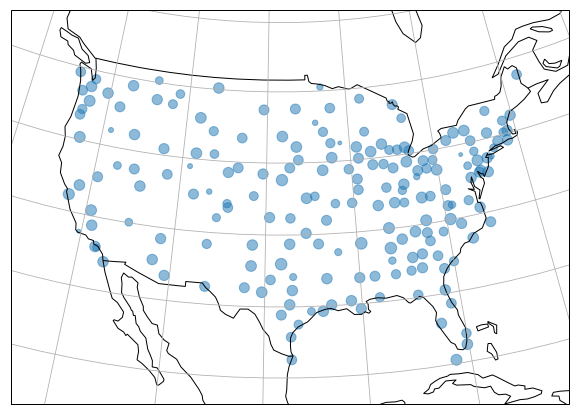

In [409]:
# plotting out sites, and showing years as circle size
extent = [-123, -72, 19, 53]
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_latitude=39.5, central_longitude=-98.35))
ax.scatter(df_siteyears.lon.astype(float)*-1, df_siteyears.lat.astype(float), 
           transform=ccrs.PlateCarree(), s=df_siteyears.years.astype(float)*5, alpha=0.5)
ax.set_extent(extent)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.gridlines()
plt.show()

### 2. Load in all simulation outputs

In [410]:
files = glob.glob('/home/disk/eos8/ach315/upscale/sims/con/out1/*')
len(files)

1920

In [411]:
# manual update of maizsim output column name
cols = ['jday', 'time', 'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI', 'RH', 
        'leaf_WP', 'PFD', 'solrad', 'temp_soil', 'temp_air', 'temp_can', 'ET_dmd', 'ET_suply',
        'Pn', 'Pg', 'resp', 'av_gs', 'LAI_sunlit', 'LAI_shaded', 'PFD_sunlit', 'PFD_shaded', 
        'An_sunlit', 'An_shaded', 'Ag_sunlit', 'Ag_shaded', 'gs_sunlit', 'gs_shaded', 'VPD',
        'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL', 'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf', 'dm_dropleaf', 
        'df_stem', 'df_root', 'roil_rt', 'mx_rootdept', 'available_water', 'soluble_c', 'note']

In [309]:
# Fetching max ear biomass value (proxy for yield) from maizsim outputs
# - For some weird reason, quite a few sim outputs don't have headers.
# - I wonder if this has anything to do with the files that I overwrote when moving them into the separate folders.

dm_ears = list()
sites = list()
years = list()

for file in files:
    site = file.split('/')[-1].split('_')[-2]
    year = file.split('/')[-1].split('_')[-1].split('.')[-2]
    try:
        df = pd.read_csv(file)
        df.columns = cols
        ear = df.dm_ear.max()
        dm_ears.append(ear)
        sites.append(site)
        years.append(year)
    except:
        print(file)
        df = pd.read_csv(file, header=None, index_col=[0])
        df.columns = cols
        ear = df.dm_ear.max()
        dm_ears.append(ear)
        sites.append(site)
        years.append(year)


/home/disk/eos8/ach315/upscale/sims/con/out1/out1_13958_1983.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_13959_1982.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_14737_1981.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_24233_1979.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_93721_1980.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_94814_1974.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_94822_1975.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_03820_1985.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_03856_1986.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_03860_1984.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_03937_1987.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_14768_1983.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_14820_1982.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_14913_1981.txt
/home/disk/eos8/ach315/upscale/sims/con/out1/out1_94846_1979.txt
/home/disk/eos8/ach315/up

### 3. Create master df that includes lat/lon, year, yield

In [ ]:
df_summary = pd.DataFrame({'ear': dm_ears, 'site': sites, 'year': years})
# there are a few runs that gave extremely high dm_ear values, removing them for now
indexlist = df_summary[df_summary.ear > 10000].index 
df_summary = df_summary.drop(indexlist)
df_summary.head()

In [336]:
# merging in lat/lon site info
df_summary = pd.merge(df_summary, df_siteinfo, on='site')
df_summary.head()

In [419]:
df_summary.head()

,ear,site,year,city,state,lat,lon
0,53.39,03103,1964,FLAGSTAFF,AZ,35.08,111.4
1,50.73,03103,1988,FLAGSTAFF,AZ,35.08,111.4
2,87.67,03812,1973,ASHEVILLE,NC,35.26,82.32
3,99.10,03812,1975,ASHEVILLE,NC,35.26,82.32
4,97.84,03812,1979,ASHEVILLE,NC,35.26,82.32


### 3. Plotting out yield maps

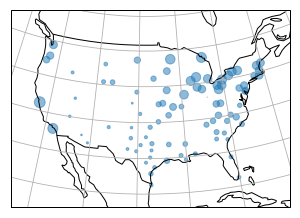

In [555]:
year = 1990
fig = plt.figure(figsize=(5,5))
extent = [-123, -72, 19, 53]
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_latitude=39.5, central_longitude=-98.35))
df_sub = df_summary[df_summary.year == str(year)]    
ax.scatter(df_sub.lon.astype(float)*-1, df_sub.lat.astype(float), 
           transform=ccrs.PlateCarree(), s=df_sub.ear, alpha=0.5)
ax.set_extent(extent)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.gridlines()
plt.show()

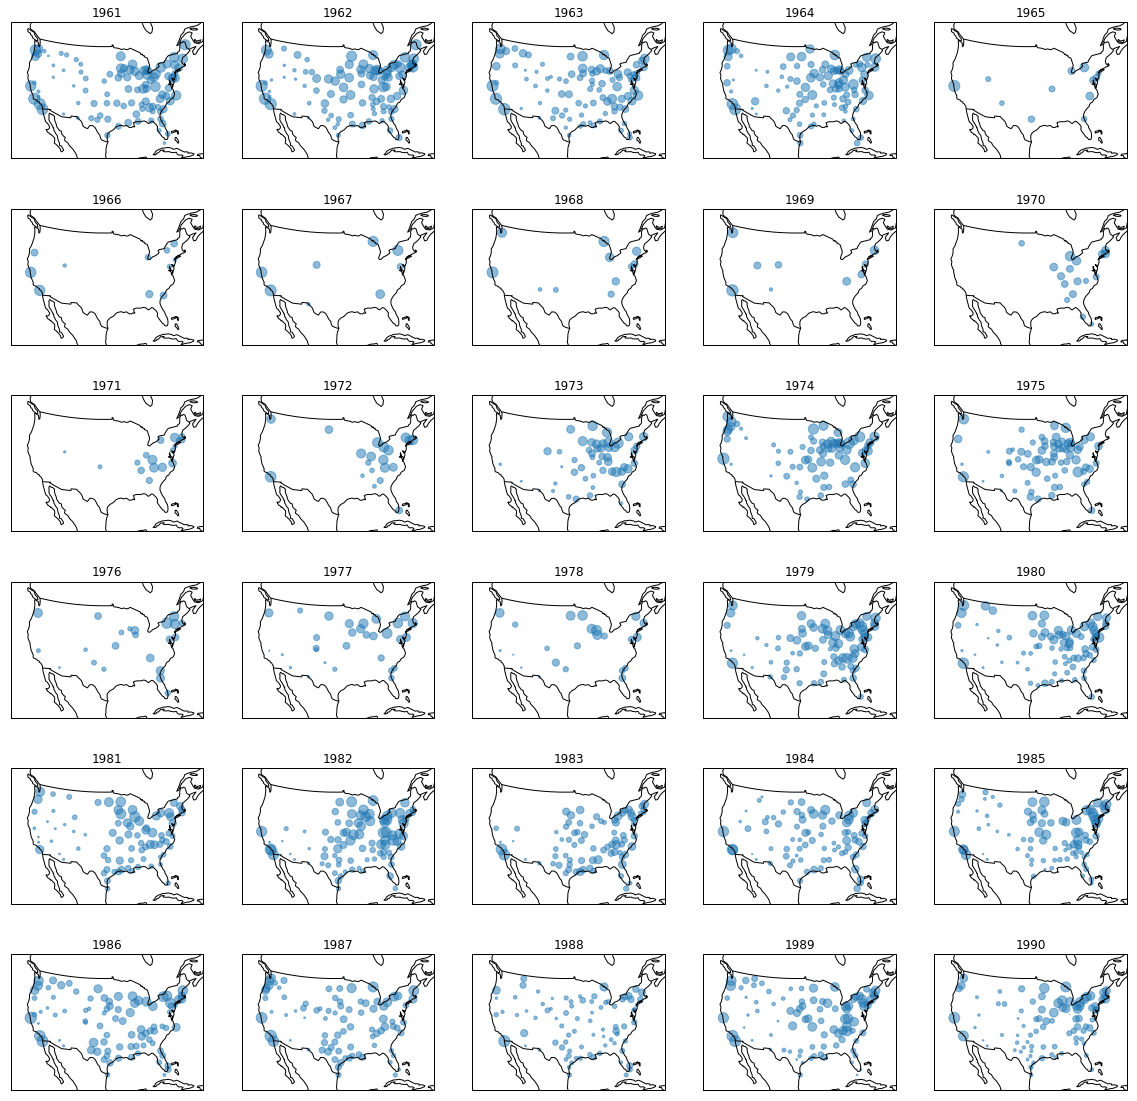

In [562]:
years = np.arange(1961, 1991)
extent = [-123, -72, 19, 53]

fig, axs = plt.subplots(6, 5, figsize=(20,20),
                        subplot_kw={'projection': ccrs.AlbersEqualArea(central_latitude=39.5, central_longitude=-98.35)})
#fig.suptitle('ear biomass') # not sure why this tile is so far away

for ax, year in zip(axs.flatten(), years):
    df_sub = df_summary[df_summary.year == str(year)]
    ax.scatter(df_sub.lon.astype(float)*-1, df_sub.lat.astype(float), 
               transform=ccrs.PlateCarree(), s=df_sub.ear, alpha=0.5) # what does 'transform' do, and why does it not work when 
                                                                      # I use 'AlbersEqualArea'?
    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.set(title=year)    

### 3. Create master df that includes lat/lon, year, yield